In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session\

#  Viết, đọc bộ dữ liệu trực tiếp trên kaggle

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print(train.shape, test.shape)
train.head()

(42000, 785) (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Y_train=train["label"]
X_train=train.drop(labels=["label"],axis=1)  #  xóa cột label


In [4]:
X_train=X_train/255.0
test=test/255.0
#  /255.0 vì 2 lý do, một để giảm trọng số cho tập dữ liệu nhằm đơn giản tính toán => đưa về 0 và 1, 
# hai là vì pixel tối đa của ảnh là 255 
print("x_train: ",X_train.shape)
print("test shape: ",test.shape)

x_train:  (42000, 784)
test shape:  (28000, 784)


In [5]:
#reshape 
# bước này để thay đổi chiều cho đầu vào để phù hợp với mô hình sử dụng đào tạo và số chiều của ảnh (xám:1, màu:3) 
X_train_cnn=X_train.values.reshape(-1,28,28,1)
test_cnn=test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train_cnn.shape)
print("test shape: ",test_cnn.shape)

#label encoding
from keras.utils.np_utils import to_categorical #one-hot
Y_train_cnn=to_categorical(Y_train,num_classes=10) # chuyển vector matrix Y_train thành một ma trận từ 0 đến num_classes

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [6]:
from sklearn.model_selection import train_test_split
X_train_cnn,X_val_cnn,Y_train_cnn,Y_val_cnn=train_test_split(X_train_cnn,Y_train_cnn,test_size=0.3,random_state=2)
#chia dữ liệu 70%  train và 30% test
print("x_train shape",X_train_cnn.shape)
print("x_test shape",X_val_cnn.shape)
print("y_train shape",Y_train_cnn.shape)
print("y_test shape",Y_val_cnn.shape)

x_train shape (29400, 28, 28, 1)
x_test shape (12600, 28, 28, 1)
y_train shape (29400, 10)
y_test shape (12600, 10)


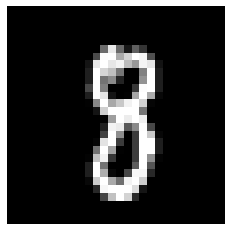

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train_cnn[10][:,:,0],cmap="gray")
plt.axis("off")
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

#build model CNN
model_cnn = models.Sequential()

model_cnn.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
#filters=16 tức số chiều của không gian đầu ra (tức là số lượng bộ lọc đầu ra trong bước tích chập).
#strides=(3,3) xác định các bước của tích chập dọc theo chiều cao và chiều rộng, tức là mỗi lần nó quét 1 ma trận 3x3 trên ma trận
#hình ảnh từ trái qua phải từ trên xuống dưới
#activation='relu' sử dụng hàm kích hoạt ReLU để lọc các giá trị < 0

model_cnn.add(layers.MaxPooling2D(strides=(2, 2)))
#bước này để giảm ma trận đầu vào và rút trích đặc trưng bằng cách lấy giá trị lớn nhất trong cửa sổ(ma trận) strides khi nó quét qua 

model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D(strides=(2,2)))
#các bước này tương tự như trên, mục đích cho việc lặp đi lặp lại nói chung là để giảm ma trận đầu vào
#thành một ma trận có kích thước nhỏ nhằm giảm độ phức tạp, rút ngắn thời gian tính toán cũng như kích thước cho mô hình
#nhưng vẫn giữ lại được các đặc trưng quan trọng. 

model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D(strides=(2,2)))

model_cnn.add(layers.Flatten())
#dữ liệu được làm phẳng để tránh trường hợp overfit(quá khớp) cho dữ liệu

model_cnn.add(layers.Dense(1024, activation='relu'))
#là một fully connected layer, tức toàn bộ các unit của layer trước đó được nối với toàn bộ các unit của layer hiện tại

model_cnn.add(layers.Dense(10, activation='softmax'))
#activation='softmax' chuyển đổi một vectơ thực thành một vectơ xác suất phân loại
#thường được sử dụng làm kích hoạt cho lớp cuối cùng của mạng phân loại vì kết quả có thể được hiểu là phân phối xác suất.

In [9]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [10]:
batch_size  = 32
epochs =  30

In [11]:
model_cnn.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
#optimizer="Adam" trình tối ưu hóa triển khai thuật toán Adam
#loss="categorical_crossentropy" để tính toán sự mất mát chéo giữa các nhãn và các dự đoán
#metrics=["accuracy"] tính tần suất dự đoán các nhãn bằng nhau

history=model_cnn.fit(X_train_cnn,Y_train_cnn,batch_size=batch_size,epochs=epochs,validation_data=(X_val_cnn,Y_val_cnn))
#train mô hình với kích thước là 32 bộ cho mỗi lượt trên một vòng lặp và lặp 30 lần
# acc  = 0.9973

Epoch 1/30
919/919 [==============================] - 15s 16ms/step - loss: 0.6327 - accuracy: 0.8006 - val_loss: 0.1294 - val_accuracy: 0.9602
Epoch 2/30
919/919 [==============================] - 14s 15ms/step - loss: 0.1153 - accuracy: 0.9640 - val_loss: 0.0940 - val_accuracy: 0.9706
Epoch 3/30
919/919 [==============================] - 14s 15ms/step - loss: 0.0784 - accuracy: 0.9749 - val_loss: 0.0749 - val_accuracy: 0.9764
Epoch 4/30
919/919 [==============================] - 13s 14ms/step - loss: 0.0588 - accuracy: 0.9821 - val_loss: 0.0734 - val_accuracy: 0.9770
Epoch 5/30
919/919 [==============================] - 14s 15ms/step - loss: 0.0463 - accuracy: 0.9848 - val_loss: 0.0755 - val_accuracy: 0.9784
Epoch 6/30
919/919 [==============================] - 14s 15ms/step - loss: 0.0382 - accuracy: 0.9870 - val_loss: 0.0915 - val_accuracy: 0.9717
Epoch 7/30
919/919 [==============================] - 14s 15ms/step - loss: 0.0349 - accuracy: 0.9897 - val_loss: 0.0764 - val_accuracy:

Chart of model


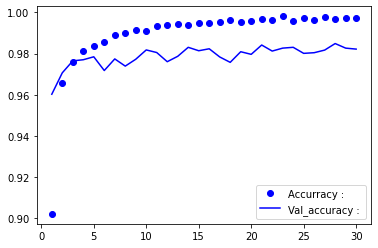

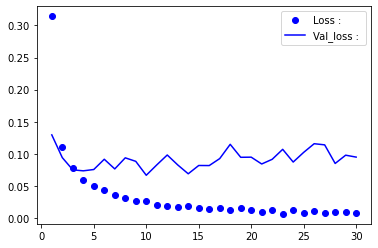

In [12]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Accurracy : ")
plt.plot(epochs, val_acc, "b", label = "Val_accuracy : ")
print("Chart of model")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label = "Loss : ")
plt.plot(epochs, val_loss, "b", label = "Val_loss : ")

plt.legend()


plt.show()

#Ghi lại lịch sử chạy và vẽ biểu đồ cho từng vòng với các accuracy, val_accuracy và loss, val_loss

In [ ]:
#chạy dự đoán cho tập test_cnn và lưu vào file csv và đạt 0.98053 cho mô hình
preds = model_cnn.predict(test_cnn)
labels = [np.argmax(x) for x in preds]
ids = [x+1 for x in range(len(preds))]

sub = pd.DataFrame()
sub['ImageId'] = ids
sub['Label'] = labels

sub.to_csv('submission.csv', index=False)

**SVM and Decision Tree Model**

In [13]:
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_  =  X_train
test_  =  test
Y_train_  =  Y_train

X_train_,X_val_,Y_train_,Y_val_=train_test_split(X_train_,Y_train_,test_size=0.3,random_state=2)
#chia dữ liệu thành 70% train và 30% test
#do ma trận đầu vào của CNN khác 2 mô hình nên thực hiện chia lại
#svm và decision tree có cùng đầu vào nên sử dụng cùng tập train và test cho cả 2 mô hình 

In [14]:
model_svm = svm.SVC(kernel='poly')
#dùng hàm nhân poly
model_svm.fit(X_train_, Y_train_)
y_pred_svm = model_svm.predict(X_val_)

In [15]:
print("hold-out: %.3f" % accuracy_score(Y_val_, y_pred_svm))
#dùng nghi thức hold-out để đánh giá cho 2 mô hình
#hold-out: 0.970

hold-out: 0.970


In [16]:
model_dt = tree.DecisionTreeClassifier(criterion="entropy")
#dùng tiêu chí 
model_dt.fit(X_train_, Y_train_)
y_pred_dt = model_dt.predict(X_val_)

In [17]:
print("hold-out: %.3f" % accuracy_score(Y_val_, y_pred_dt))
#hold-out: 0.859

hold-out: 0.859
